In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

2024-07-29 08:38:41.389960: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-29 08:38:41.390071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-29 08:38:41.546249: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
train_data.head()
train_image = train_data.drop("label", axis=1)
train_label = train_data["label"]

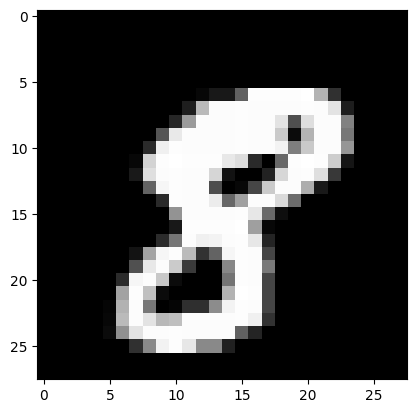

8


In [4]:
image = train_image.iloc[10].values
image = image.reshape((28,28))
plt.imshow(image, cmap="gray")
plt.show()
print(train_label.iloc[10])

In [5]:
def normalize_df(df):
    return df / 255

def reshape_im(df):
    return df.values.reshape(-1, 28, 28, 1)

def preprocess(df):
    df = normalize_df(df)
    return reshape_im(df)

def categorize_labels(df):
    return keras.utils.to_categorical(df, num_classes = 10)

In [6]:
images = preprocess(train_image)
labels = categorize_labels(train_label)

In [7]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=2)

print("X_train shape is ",X_train.shape)
print("y_train shape is ",y_train.shape)
print("X_val shape is ",X_val.shape)
print("y_val shape is ",y_val.shape)

X_train shape is  (33600, 28, 28, 1)
y_train shape is  (33600, 10)
X_val shape is  (8400, 28, 28, 1)
y_val shape is  (8400, 10)


In [8]:
model_leNet = keras.models.Sequential([
    keras.layers.Conv2D(filters=6, kernel_size=28, activation="tanh", input_shape=(28, 28, 1), padding="same"),
    keras.layers.AvgPool2D(2, strides=2),
    keras.layers.Conv2D(filters=16, kernel_size=5, activation="tanh", input_shape=(14,14,6), padding="same"),
    keras.layers.AvgPool2D(2),
    keras.layers.Conv2D(filters=120, kernel_size=5, activation="tanh", padding="same"),
    keras.layers.Flatten(),
    keras.layers.Dense(84, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")
])
model_leNet.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
model_leNet.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │         4,710 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 7, 7, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5880)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 84)             │       494,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,100 (2.10 MB)

 Trainable params: 550,100 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
epochs, batch_size = 10, 250
steps =  X_train.shape[0] // batch_size
history = model_leNet.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=epochs,
                          steps_per_epoch=steps, validation_data=(X_val, y_val), verbose=2)

Epoch 1/10
134/134 - 187s - 1s/step - accuracy: 0.9484 - loss: 0.1784 - val_accuracy: 0.9474 - val_loss: 0.1819
Epoch 2/10
134/134 - 23s - 170ms/step - accuracy: 0.9300 - loss: 0.2657 - val_accuracy: 0.9474 - val_loss: 0.1850
Epoch 3/10
134/134 - 186s - 1s/step - accuracy: 0.9546 - loss: 0.1531 - val_accuracy: 0.9539 - val_loss: 0.1609
Epoch 4/10
134/134 - 23s - 170ms/step - accuracy: 0.9500 - loss: 0.1551 - val_accuracy: 0.9540 - val_loss: 0.1624
Epoch 5/10
134/134 - 186s - 1s/step - accuracy: 0.9608 - loss: 0.1306 - val_accuracy: 0.9576 - val_loss: 0.1414
Epoch 6/10
134/134 - 23s - 169ms/step - accuracy: 0.9800 - loss: 0.1169 - val_accuracy: 0.9585 - val_loss: 0.1405
Epoch 7/10
134/134 - 239s - 2s/step - accuracy: 0.9654 - loss: 0.1167 - val_accuracy: 0.9555 - val_loss: 0.1454
Epoch 8/10
134/134 - 22s - 166ms/step - accuracy: 0.9800 - loss: 0.0706 - val_accuracy: 0.9544 - val_loss: 0.1483
Epoch 9/10
134/134 - 239s - 2s/step - accuracy: 0.9688 - loss: 0.1023 - val_accuracy: 0.9633 - v

In [13]:
model_leNet.save("/kaggle/working/MyLeNet05.keras")

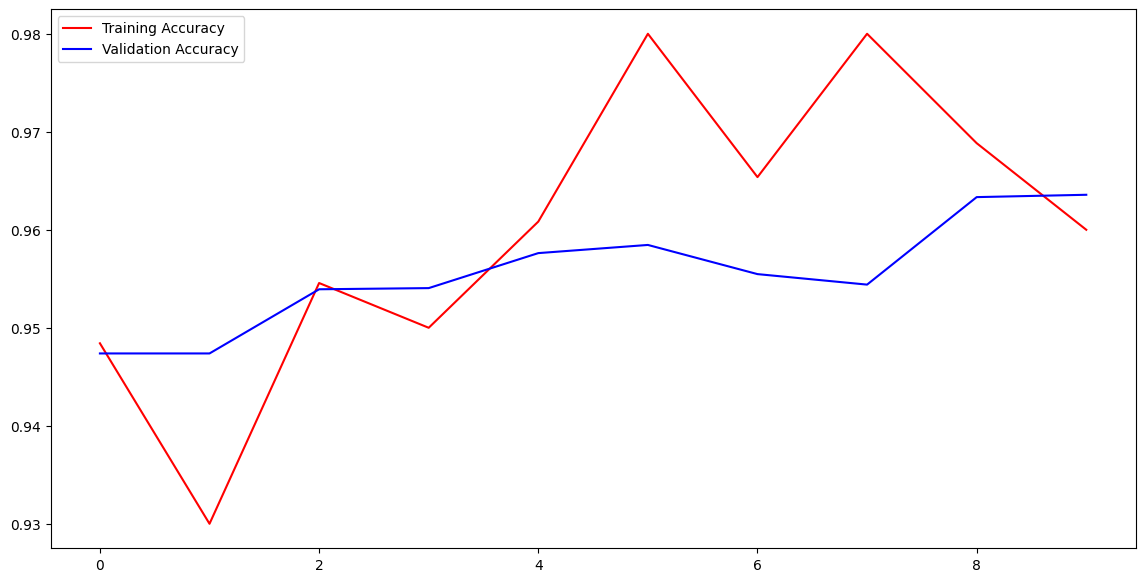

In [14]:
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(len(accuracy))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,accuracy,'r',label="Training Accuracy")
plt.plot(epochs,validation_accuracy,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

263/263 ━━━━━━━━━━━━━━━━━━━━ 24s 91ms/step


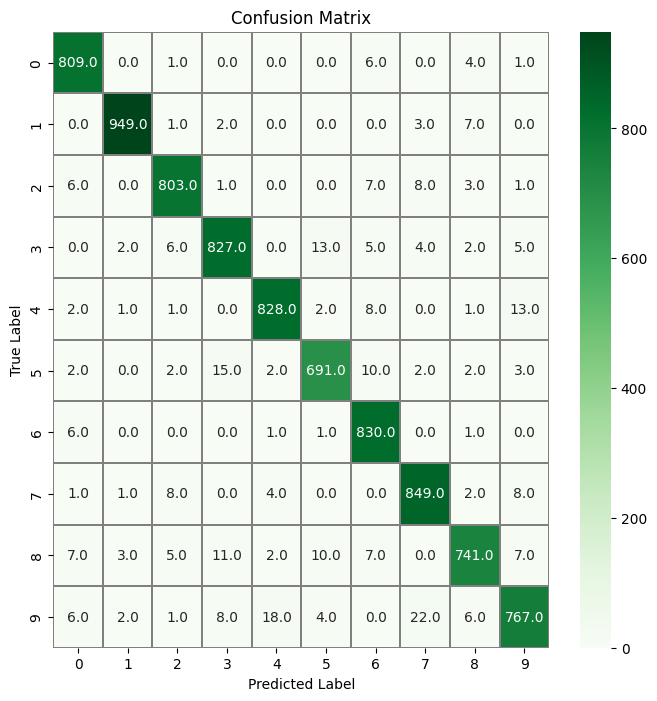

In [15]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the values from the validation dataset
y_pred = model_leNet.predict(X_val)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [16]:
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test_images = preprocess(test_data)

In [17]:
y_test_pred = model_leNet.predict(test_images)
y_pred_classes = np.argmax(y_test_pred,axis = 1) 


875/875 ━━━━━━━━━━━━━━━━━━━━ 80s 91ms/step


In [18]:
df1= pd.DataFrame(y_pred_classes, columns=['Label'])
df2=pd.DataFrame(range(1,df1.shape[0]+1),columns=['ImageId'])
results = pd.concat([df2, df1],axis = 1)
results.to_csv("submission.csv", index = False)
print("result_saved")

result_saved


In [19]:
submission = pd.read_csv("submission.csv")
submission.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2
